# Regression

Linear Regression is one of the simplest models there is. There are two different ways of training one:

1. Using a closed-form equation: In this way, compute model parameters to best fit the model to the training set. We are essentially minimizing a cost function.

2. Using Gradient Descent (GD): GD is an important optimization algorithm that iteratively minimizes the cost function, and eventually converges to the right model parameters.

Polynomial regression is a more complex model used on non-linear datasets. Due to it having more parameters, it is prone to model over-fitting.

One of the more popular regression models include Logistic Regression and one other: Softmax Regression.

## Linear Regression

Linear regression is a linear model. This means that it makes prediction by taking the weighted sum of input features added onto a "bias" (or intercept) term.

$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \dots + \theta_{n}x_n
$$

$$
\hat{y} = \theta_{0} + \sum_{i = 1}^{n}{\theta_{i} x_i }
$$

Where:
- $\hat{y}:$ is the predicted y value.
- $x_{i}:$ is the ith feature.
- $\theta_{0}:$ is the bias/intercept term.
- $\theta_{i}:$ is the ith model input weight.

We can represent this much more concisely in vectorized form:

$$
\hat{y} = h_{\theta}(x) = \vec{\theta} \cdot \vec{x}
$$

Where:
- h: is the hypothesis function.
- $\theta$: is an n-dimensional vector of model weights, called the parameter vector.
- $x$: is an n-dimensional vector of model features / inputs, called the feature vector.

Common metrics for evaluating Regression models include:

- Root Mean Squared Error
- Mean Squared Error

$$
MSE(\textbf{X}, h_{\theta}) = \frac{1}{m} \sum_{i = 1}^{m} (\theta^{T} x^{(i)} - (y)^{(i)}) ^2
$$

Here X represents the entire dataset matrix, while x is the ith row from that matrix.

In [35]:
import numpy as np

np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
# Observe: the intercept/bias is 4 and the coeff. is 3
y = 4 + 3 * X + np.random.rand(m, 1)

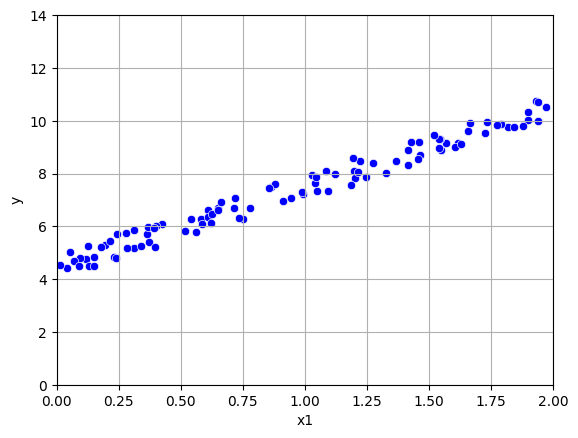

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=y[:, 0], color='blue')
plt.axis([0, 2, 0, 14])
plt.xlabel('x1')
plt.ylabel('y')
plt.grid(True)
plt.show()

We can compute the best theta values by using the Normal Equation.

$$
\hat{\theta} = (X^{T}X)^{-1} X^{T} y
$$

In [37]:
from numpy.linalg import inv
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

# This uses the Normal Equation to compute the best theta values
# pos(0) is the bias term, the others are the weights
# note: @ here is used as matrix multiplication
theta_best = inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.51359766],
       [2.98323418]])

### Let's make predictions using theta best

In [42]:
X_new = np.array([[0], [2]])
X_b_new = add_dummy_feature(X_new)

y_predict =  X_b_new @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

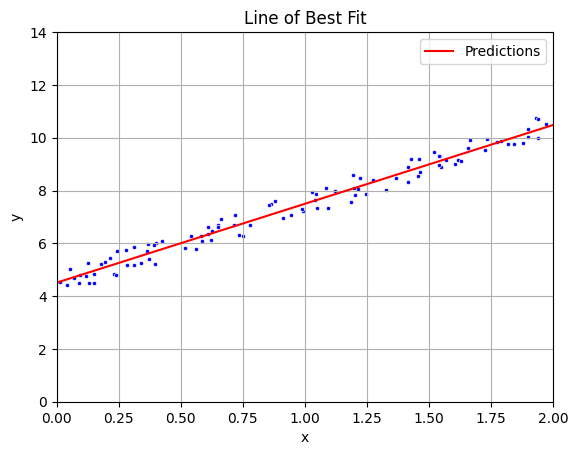

In [52]:
sns.scatterplot(x=X[:, 0], y=y[:, 0], color='blue', marker='.')
sns.lineplot(x=X_new[:, 0], y=y_predict[:, 0], color='red', label='Predictions')

plt.title('Line of Best Fit')
plt.axis([0, 2, 0, 14])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()